Decision Tree Classifier Accuracy: 0.9473684210526315

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



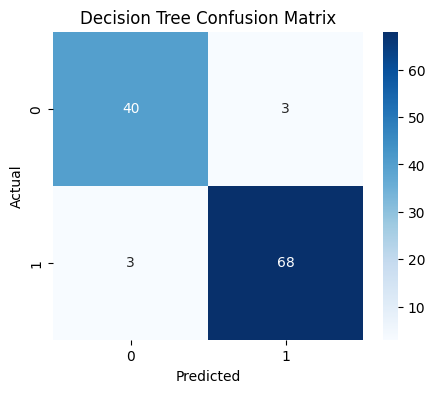


Random Forest Classifier Accuracy: 0.9649122807017544

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



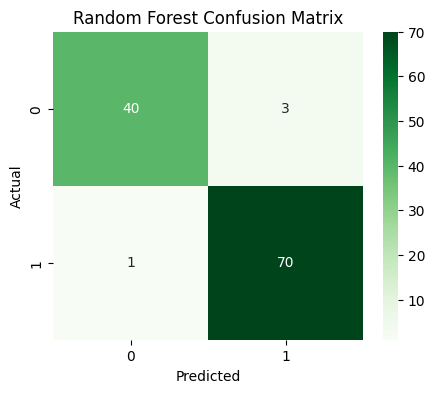


Decision Tree Regressor MSE: 0.5245146178314735
Decision Tree Regressor R² Score: 0.5997321244428706

Random Forest Regressor MSE: 0.2553684927247781
Random Forest Regressor R² Score: 0.8051230593157366


In [1]:
# ===========================
# 1. IMPORT LIBRARIES
# ===========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

import graphviz

# ===========================
# 2. CLASSIFICATION - Decision Tree & Random Forest
# ===========================

# Load dataset
cancer_data = load_breast_cancer()
df_class = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df_class['target'] = cancer_data.target

# Features and target
X = df_class.drop('target', axis=1)
y = df_class['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Decision Tree Classifier ----
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Visualize Decision Tree
dot_data = export_graphviz(
    dt_clf, out_file=None,
    feature_names=cancer_data.feature_names,
    class_names=cancer_data.target_names,
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_classification", format="png", cleanup=True)  # Saves as PNG

# Confusion Matrix - Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- Random Forest Classifier ----
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===========================
# 3. REGRESSION - Decision Tree & Random Forest
# ===========================

# Load regression dataset
housing_data = fetch_california_housing()
df_reg = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df_reg['target'] = housing_data.target

# Features and target
X_reg = df_reg.drop('target', axis=1)
y_reg = df_reg['target']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# ---- Decision Tree Regressor ----
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt_reg = dt_reg.predict(X_test_reg)

print("\nDecision Tree Regressor MSE:", mean_squared_error(y_test_reg, y_pred_dt_reg))
print("Decision Tree Regressor R² Score:", r2_score(y_test_reg, y_pred_dt_reg))

# ---- Random Forest Regressor ----
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

print("\nRandom Forest Regressor MSE:", mean_squared_error(y_test_reg, y_pred_rf_reg))
print("Random Forest Regressor R² Score:", r2_score(y_test_reg, y_pred_rf_reg))
